In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, f1_score
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score,StratifiedKFold
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.decomposition import PCA

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (24, 1060)
csv (16, 1060)
csv (72, 1060)
csv (48, 1060)
csv (78, 1060)
csv (191, 1060)
csv (132, 1059)
csv (224, 1060)
csv (18, 1060)
csv (42, 1060)
csv (142, 1060)
csv (154, 1060)
csv (186, 1060)
csv (29, 1060)
csv (120, 1060)
csv (80, 1060)
csv (28, 1060)
csv (348, 1060)
csv (102, 1060)
csv (180, 1060)
csv (198, 1060)
csv (222, 1060)
csv (77, 1060)
csv (110, 1060)
csv (10, 1060)
csv (254, 1060)
xlx (680, 1059)
csv (210, 1060)
csv (250, 1060)
xlx (224, 1059)
csv (92, 1060)
csv (80, 1060)
csv (240, 1060)
csv (322, 1060)


In [6]:
result.iloc[:,14:]

,.1,195.462,196.256,197.049,197.841,198.634,199.427,200.22,201.013,201.805,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,,100.0000,100.0000,100.0000,100.00000,100.000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.0000,100.0000,0.000000,NaN
1,,100.0000,100.0000,100.0000,100.00000,100.000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.0000,100.0000,100.000000,NaN
2,,83.3333,121.8750,262.5000,262.50000,180.926,181.2600,182.3190,182.4120,182.5040,...,194.7650,195.0150,194.5450,194.8950,195.2150,87.500,12.5000,75.0000,0.000000,NaN
3,,75.0000,71.0526,-191.8600,-24.41860,44.161,44.6280,44.9298,44.9071,45.0548,...,48.1003,47.2197,46.7071,46.3795,46.3823,367.241,284.4830,-30.0000,67.582400,NaN
4,,16.6667,53.1250,237.5000,137.50000,186.481,187.8100,187.4750,188.2890,188.5230,...,189.8820,189.7280,189.3540,189.1680,190.1430,212.500,67.5000,125.0000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,,-500.0000,-18.7500,51.5625,86.02940,91.178,91.5159,91.2244,91.8669,92.1103,...,93.4979,93.4580,94.8663,94.1502,95.9501,-112.500,-52.2321,63.0319,-192.287000,NaN
5179,,-500.0000,-295.7980,304.6030,-2.21607,102.268,102.0740,101.9010,101.8810,102.5120,...,104.2120,104.1180,103.6690,103.8840,103.5930,103.766,76.8267,75.9124,0.834202,NaN
5180,,-500.0000,1412.5000,53.1250,-98.52940,104.265,104.3430,104.5630,104.9770,104.9920,...,109.0160,109.4930,108.7480,107.4540,107.6220,244.231,-208.0360,60.1064,-35.638300,NaN
5181,,100.0000,100.0000,100.0000,100.00000,100.000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.0000,100.0000,100.000000,NaN


In [4]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [5]:
result.shape

(5183, 1060)

In [7]:
result_2= result.loc[:,'195.462':'700.577']
result_2.columns
# df_without_calb_None['414.985':'537.294']

Index(['195.462', '196.256', '197.049', '197.841', '198.634', '199.427',
       '200.22', '201.013', '201.805', '202.598',
       ...
       '693.841', '694.59', '695.339', '696.087', '696.836', '697.584',
       '698.332', '699.081', '699.829', '700.577'],
      dtype='object', length=656)

In [8]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'195.462':'700.577']
result_1= result.iloc[:,1:14]


In [9]:
print(result_2.shape, result_3.shape)

(5183, 656) (5183,)


In [10]:
df = pd.concat([result_2,result_3], axis=1)
df.head()


,195.462,196.256,197.049,197.841,198.634,199.427,200.22,201.013,201.805,202.598,...,694.59,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,Output
0,100.0000,100.0000,100.00,100.0000,100.000,100.000,100.0000,100.0000,100.0000,100.0000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,W_Calibration
1,100.0000,100.0000,100.00,100.0000,100.000,100.000,100.0000,100.0000,100.0000,100.0000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,F_Calibration
2,83.3333,121.8750,262.50,262.5000,180.926,181.260,182.3190,182.4120,182.5040,182.8290,...,186.718,186.777,186.796,186.780,186.807,186.832,186.873,186.819,186.894,W_3490A2/143_K_Faint_0.501_VS2
3,75.0000,71.0526,-191.86,-24.4186,44.161,44.628,44.9298,44.9071,45.0548,45.3845,...,117.260,117.281,118.078,118.726,119.820,119.442,120.148,119.487,119.473,F_3490A2/143_K_Faint_0.501_VS2
4,16.6667,53.1250,237.50,137.5000,186.481,187.810,187.4750,188.2890,188.5230,187.8750,...,184.484,184.567,184.580,184.645,184.690,184.728,184.776,184.780,184.841,W_3521A2/49_J_Medium_0.501_VS2


In [19]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

In [58]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [12]:
df_without_calb.head()

,195.462,196.256,197.049,197.841,198.634,199.427,200.22,201.013,201.805,202.598,...,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,Output,w/f
2,83.3333,121.8750,262.5000,262.5000,180.9260,181.2600,182.3190,182.4120,182.5040,182.8290,...,186.7770,186.7960,186.7800,186.8070,186.8320,186.8730,186.8190,186.8940,W_3490A2/143_K_Faint_0.501_VS2,W
3,75.0000,71.0526,-191.8600,-24.4186,44.1610,44.6280,44.9298,44.9071,45.0548,45.3845,...,117.2810,118.0780,118.7260,119.8200,119.4420,120.1480,119.4870,119.4730,F_3490A2/143_K_Faint_0.501_VS2,F
4,16.6667,53.1250,237.5000,137.5000,186.4810,187.8100,187.4750,188.2890,188.5230,187.8750,...,184.5670,184.5800,184.6450,184.6900,184.7280,184.7760,184.7800,184.8410,W_3521A2/49_J_Medium_0.501_VS2,W
5,75.0000,98.6842,-68.0233,99.4186,71.4934,71.4331,71.9391,71.8566,71.8388,71.7073,...,112.0860,111.6220,112.8750,113.7050,114.7430,114.3350,114.8770,114.6750,F_3521A2/49_J_Medium_0.501_VS2,F
8,83.3333,31.7661,-255.2680,46.3899,94.3083,94.1460,94.5590,94.8745,95.3149,95.3094,...,99.7351,99.7343,99.7684,99.7811,99.8004,99.8166,99.8249,99.7948,W_3507A2/196_F_Very Strong_0.50_SI1,W


In [46]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']


In [64]:
df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'F/LB':'F','G/LB':'G', 'E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)


In [70]:
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]
df_without_calb['color'].replace({'J ':'J','I/LB':'I','F/LB':'F','G/LB':'G','E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)


In [53]:
df_without_calb_wf_None.drop(columns=['Output','quality'], inplace=True)

In [69]:
df_without_calb_None.drop(columns=['Output','w/f','quality'], inplace=True)

In [56]:
df_without_calb_None['w/f'].replace({'W':1,'F':0},inplace=True)

In [40]:
df_without_calb[(df_without_calb['color'] == 'M') | (df_without_calb['color'] == 'L')]

,195.462,196.256,197.049,197.841,198.634,199.427,200.22,201.013,201.805,202.598,...,696.836,697.584,698.332,699.081,699.829,700.577,Output,w/f,color,quality
2987,300.000,-77.52810,32.70140,164.9010,88.5572,88.6328,89.5939,89.6747,89.5450,89.7299,...,101.330,101.302,101.284,101.276,101.308,101.307,W_GIA_L_Faint_1.53_SI1,W,L,Faint
2988,114.286,379.41200,-1275.00000,41.4894,37.5896,37.0332,37.2062,37.0002,36.9559,37.0268,...,119.733,120.042,119.888,119.970,121.091,121.584,F_GIA_L_Faint_1.53_SI1,F,L,Faint
4569,50.000,63.27680,-36.96370,67.7716,89.3314,88.7919,88.1545,88.3469,88.3498,88.7888,...,100.888,100.885,100.937,100.893,100.903,100.863,W_VK12 | 23_M_Very Strong_01.034_VS1,W,M,Very Strong
4570,0.000,160.16500,56.00300,26.4218,35.8398,36.6258,36.6675,36.2795,36.0393,36.0882,...,145.183,145.519,145.470,146.427,146.632,145.968,F_VK12 | 23_M_Very Strong_01.034_VS1,F,M,Very Strong
4593,216.667,4.06504,103.92200,59.0643,98.6564,97.9716,98.2956,98.3441,98.4593,97.8037,...,101.383,101.401,101.425,101.466,101.456,101.472,W_VD12 | 33 _M_Faint_1.1014_VS1,W,M,Faint
4594,-150.000,4.09091,2.64706,-159.5450,73.9711,73.5663,73.5211,73.6685,74.1193,74.1181,...,109.637,109.919,109.110,109.334,109.808,109.605,F_VD12 | 33 _M_Faint_1.1014_VS1,F,M,Faint
4601,0.000,-60.58980,82.88540,52.9644,90.2616,91.2295,92.0202,91.5020,91.6190,91.4791,...,102.894,102.906,102.934,102.956,102.936,102.981,W_VD12 | 33_M_Faint_1.1014_VS1,W,M,Faint
4602,300.000,111.29000,62.35960,6450.0000,41.1413,41.3585,40.8137,41.5841,40.8271,41.0657,...,116.419,116.830,117.035,116.864,116.912,117.452,F_VD12 | 33_M_Faint_1.1014_VS1,F,M,Faint


In [61]:
df_without_calb.drop(index = df_without_calb[(df_without_calb['color'] == 'M')].index, axis=0, inplace=True)

In [62]:
df_without_calb.drop(columns=['Output'], inplace=True)

In [63]:
df_without_calb['w/f'].replace({'W':1, 'F':0}, inplace=True)

In [64]:
df_without_calb.drop(index=[1113,1114], inplace=True)

In [76]:
df_without_calb.drop(index=[1107,1108], inplace=True)

In [80]:
df_without_calb.drop(index=[3267,3268,3613,3614], inplace=True)

In [79]:
df_without_calb[(df_without_calb['quality'] == 'Benth')|(df_without_calb['quality'] == 'lb')]

,195.462,196.256,197.049,197.841,198.634,199.427,200.22,201.013,201.805,202.598,...,696.087,696.836,697.584,698.332,699.081,699.829,700.577,w/f,quality,color
3267,-200.0000,19.8642,49.004,460.3050,93.0043,91.8265,92.0697,92.3121,92.1836,92.2138,...,96.3907,96.4311,96.4109,96.4053,96.4210,96.4099,96.4018,1,Benth,I
3268,-12.5000,-61.8132,-181.452,77.4793,66.2137,66.7237,66.9422,67.2362,67.5142,67.3097,...,117.7230,118.1360,119.3640,120.9060,121.8410,121.3280,123.1760,0,Benth,I
3613,150.0000,158.7790,6254.550,-80.7339,95.7562,94.9316,94.9514,94.4409,94.3863,94.9140,...,98.0049,97.9878,97.9555,97.9791,97.9819,97.9512,97.9537,1,lb,J
3614,66.6667,246.6940,-6150.000,40.6355,75.3081,76.1016,76.2016,75.4304,75.1893,74.5458,...,118.2390,118.5890,119.5100,120.5460,120.2350,120.8410,121.4380,0,lb,J


In [87]:
df_without_calb['quality'].replace({'Strong':'Very Strong'}, inplace = True)

In [91]:
df_without_calb['quality'].replace({'None':0, 'Faint':1, 'Very Strong':3, 'Medium':2}, inplace=True)

In [210]:
df_without_calb.shape

(3504, 659)

In [197]:
data = pd.concat([df_without_calb.iloc[:,100:-390],df_without_calb.iloc[:,-1]],axis=1)
# data = data[(data['color'] == 'G')|(data['color'] == 'D')]

In [211]:
for cl in data.iloc[:,:-1].columns:
    # data.drop(index = data[cl].idxmax(), inplace=True)
    data.drop(index=data[cl].idxmin(), inplace=True)

In [217]:
data.columns

Index(['274.453', '275.239', '276.026', '276.812', '277.599', '278.385',
       '279.171', '279.958', '280.744', '281.53',
       ...
       '399.478', '400.254', '401.03', '401.806', '402.581', '403.357',
       '404.133', '404.908', '405.684', 'color'],
      dtype='object', length=170)

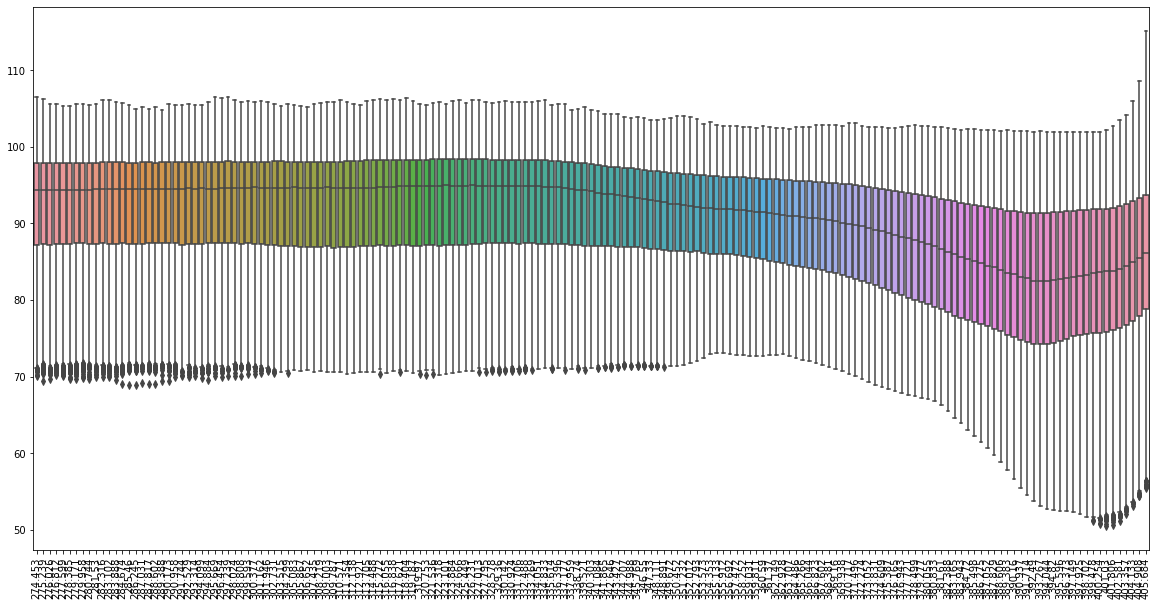

In [213]:
plt.figure(figsize=(20,10))
sns.boxplot(data =data)
plt.xticks(rotation = 90)
plt.show()

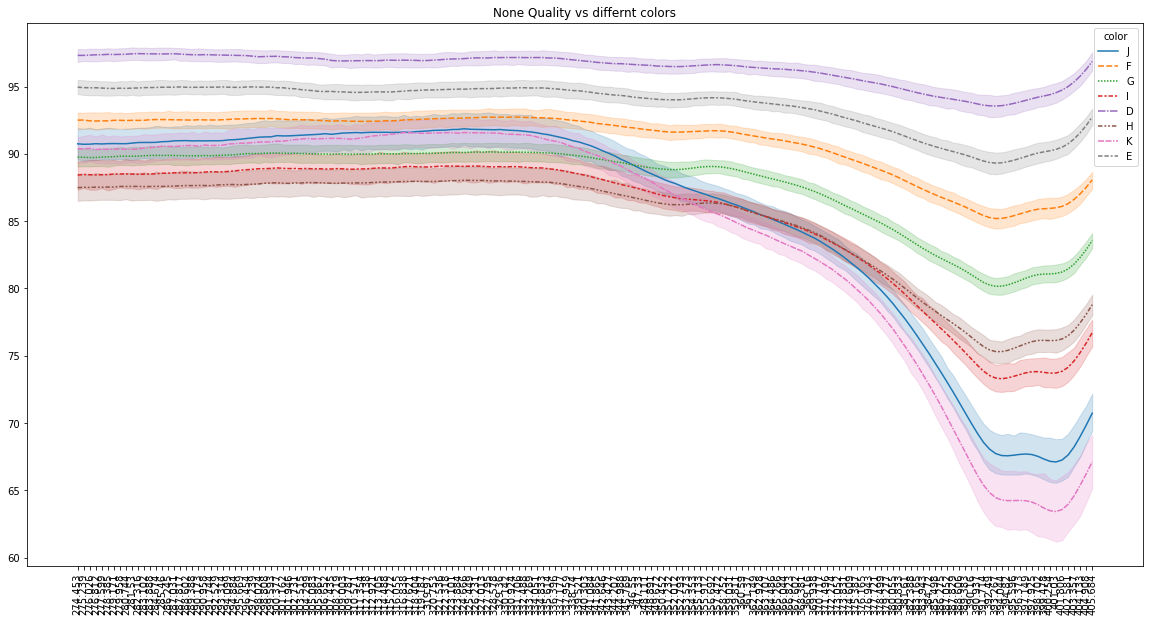

In [214]:
plt.figure(figsize=(20,10))
data1 = data.iloc[:].set_index(["color"]).T
g1 = sns.lineplot(data=data1,)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()


In [222]:
df_without_calb.iloc[:,-3:]

,w/f,quality,color
2,1,1,K
3,0,1,K
4,1,2,J
5,0,2,J
8,1,3,F
...,...,...,...
5174,0,0,G
5177,1,0,D
5178,0,0,D
5179,1,0,D


In [377]:
data_model = pd.concat([df_without_calb.iloc[:,250:-390],df_without_calb.iloc[:,-3:]],axis=1)
data_model = data_model[(data_model['quality'] == 0)]

In [378]:
data_model.columns

Index(['391.714', '392.49', '393.267', '394.044', '394.82', '395.596',
       '396.373', '397.149', '397.925', '398.702', '399.478', '400.254',
       '401.03', '401.806', '402.581', '403.357', '404.133', '404.908',
       '405.684', 'w/f', 'quality', 'color'],
      dtype='object')

In [379]:
X = data_model.iloc[:,:-2]
Y = data_model.iloc[:,-1:]

In [340]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
x_norm = pd.DataFrame(np_scaled, columns = X.columns)

In [356]:
principal=PCA(5)
x= (principal.fit_transform(x_norm))

In [357]:
x

array([[ 4.99706916e-01, -2.80049070e-03,  6.12088014e-05,
         4.44336150e-04, -7.49804525e-05],
       [-5.00326840e-01, -6.62438878e-03,  3.94793154e-04,
        -2.34985591e-04,  8.00272830e-05],
       [ 4.99756652e-01,  6.74218335e-03, -2.31087216e-04,
         3.89593918e-04, -1.14405084e-04],
       ...,
       [-5.00274967e-01,  3.27712506e-03, -4.49620678e-04,
         1.82164459e-04, -2.42925366e-05],
       [ 4.99720295e-01, -2.30851436e-04, -2.49256908e-04,
         3.63776781e-05, -4.79580541e-05],
       [-5.00265132e-01,  5.15171853e-03, -6.45322139e-04,
         2.77862227e-04, -3.22125242e-05]])

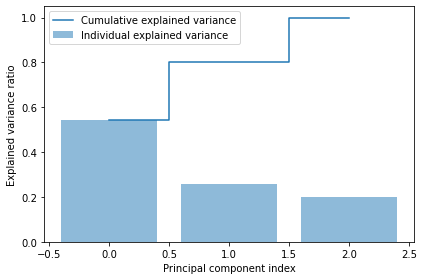

In [233]:
exp_var_pca = principal.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [380]:
balanced = class_weight.compute_class_weight(class_weight='balanced', classes=data_model['color'].value_counts().keys(),y=Y.values.reshape(-1))
balanced = dict(zip(data_model['color'].value_counts().keys(),balanced))
balanced

{'G': 0.5863970588235294,
 'F': 0.771774193548387,
 'D': 0.808277027027027,
 'H': 0.9805327868852459,
 'E': 1.0680803571428572,
 'I': 1.1127906976744186,
 'J': 2.1172566371681416,
 'K': 2.300480769230769}

In [381]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42, stratify = Y)

In [382]:
stratifiedkf=StratifiedKFold(n_splits=5, shuffle= True, random_state=42)

In [385]:
light_gb_classifier = lgb.LGBMClassifier(class_weight=balanced)
grid_values = {'n_estimators':[*range(20, 200, 20)], 'max_depth':[*range(1,10,1)],'min_samples_leaf':[*range(0,10,1)]}
boost_classifier = RandomizedSearchCV(light_gb_classifier, param_distributions= {} , cv = stratifiedkf, n_iter = 5)

In [386]:
clf = boost_classifier.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.815435,0.034976,0.016829,0.000985,{},0.456026,0.522876,0.431373,0.477124,0.529412,0.483362,0.037871,1


In [369]:
decision_classifier = DecisionTreeClassifier(class_weight=balanced)
grid_values = {'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
decision_tree_classifier = RandomizedSearchCV(decision_classifier, param_distributions= {} , cv = stratifiedkf)

In [370]:
clf = decision_tree_classifier.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009129,0.000546,0.001483,0.000347,{},0.383117,0.418301,0.437908,0.424837,0.398693,0.412571,0.019419,1


In [391]:
forest_classifier = RandomForestClassifier(class_weight = balanced)
grid_values = {'min_samples_split':[*range(0,20,1)]}
random_classifier = RandomizedSearchCV(forest_classifier, param_distributions= {}, cv=stratifiedkf, n_iter=30)

In [392]:
clf = random_classifier.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.345484,0.033306,0.011603,0.001064,{},0.508143,0.552288,0.45098,0.48366,0.526144,0.504243,0.034824,1


In [373]:
boost_classfier_ = GradientBoostingClassifier()
grid_values = {'n_estimators':[*range(50, 1000, 50)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
boost_classifier = RandomizedSearchCV(boost_classfier_, param_distributions= {} , cv = stratifiedkf)

In [374]:
clf = boost_classifier.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.705969,0.110575,0.002815,0.000401,{},0.415584,0.431373,0.477124,0.45098,0.457516,0.446516,0.021279,1


In [395]:
boost_classfier_ = xgb.XGBClassifier()
grid_values = {'n_estimators':[*range(50, 1000, 50)], 'max_depth':[*range(1,10,1)], 'max_features':[*range(1,100,1)],'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
XGboost_classifier = RandomizedSearchCV(boost_classfier_, param_distributions= {} , cv = stratifiedkf, n_iter= 50)

In [396]:
clf = XGboost_classifier.fit(X_train, Y_train)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.692507,0.018305,0.00525,0.000316,{},0.534202,0.562092,0.457516,0.486928,0.54902,0.517952,0.039478,1
